In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as imd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from tqdm import tqdm
plt.style.use('ggplot')


Text(0.5, 1.0, 'Number of image in ever Column')

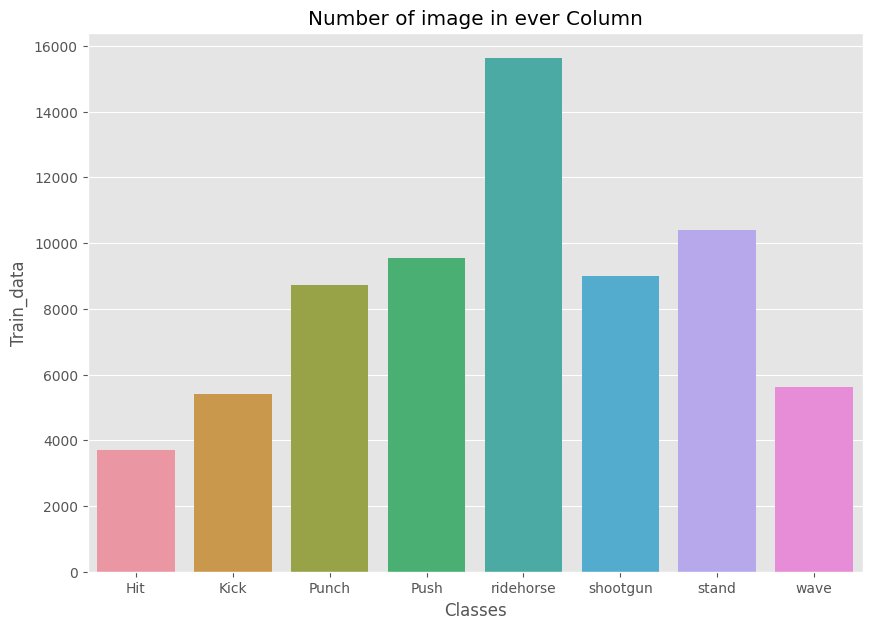

In [3]:
data = pd.read_csv('/kaggle/input/fight-dataset/metric_data.csv')
plt.figure(figsize=(10,7))
sns.barplot(data,x='Classes',y='Train_data')
plt.title('Number of image in ever Column')

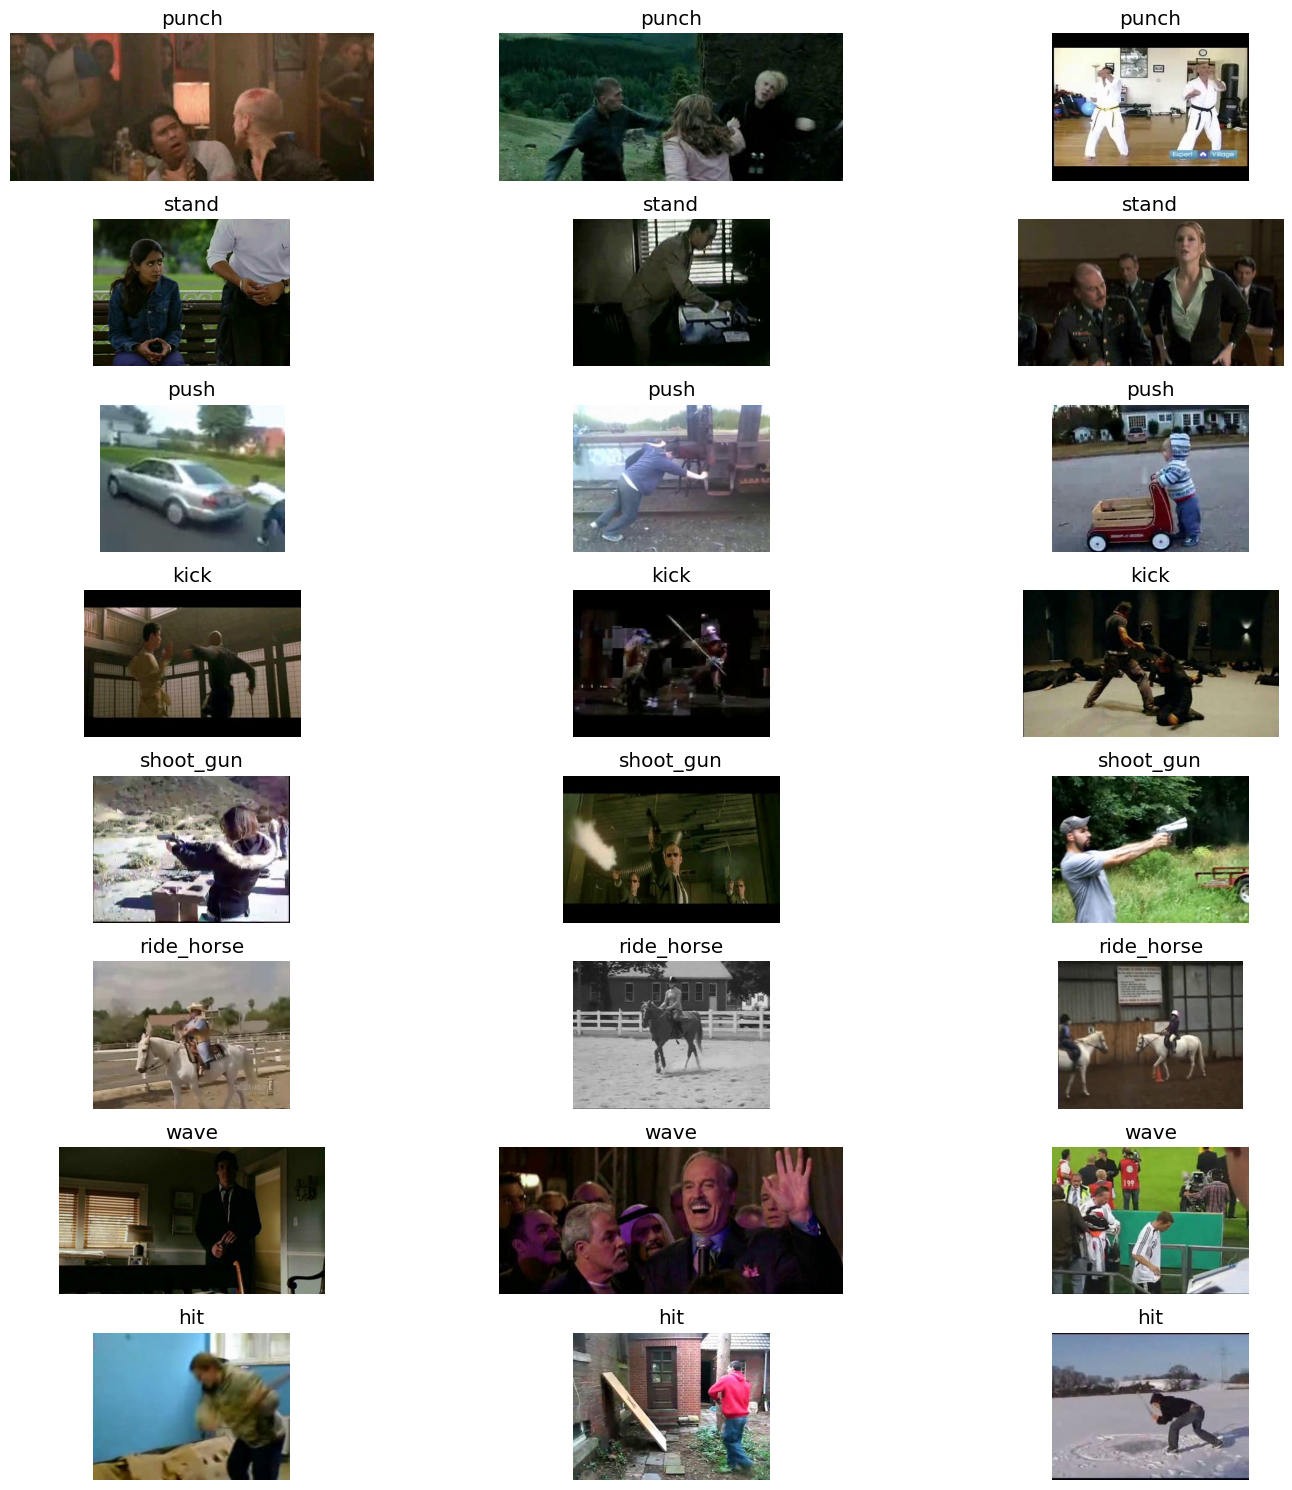

In [4]:
path = '/kaggle/input/fight-dataset/actions (2)/actions/train'
plt.figure(figsize=(15,15))

for i, r in enumerate(os.listdir(path)):
    new = os.path.join(path, r)
    for n, j in enumerate(os.listdir(new)):
        plt.subplot(len(os.listdir(path)), 3, i * 3 + n + 1) 
        
        img = os.path.join(new, j)
        plt.imshow(imd.imread(img))
        plt.title(r)
        plt.axis('off')  
        if n == 2:
            break

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values
    shear_range=0.2,        # Random shear transformations
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    validation_split=0.2    # Split for training and validation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize test data


In [7]:
train = '/kaggle/input/fight-dataset/actions (2)/actions/train'
test = '/kaggle/input/fight-dataset/actions (2)/actions/test'

train_data = train_datagen.flow_from_directory(
    train,  # Path to your training dataset
    target_size=(224, 224),  # ResNet input image size (224x224)
    batch_size=32,
    class_mode='categorical',
    subset='training'        # Specify training subset
)

Found 54442 images belonging to 8 classes.


In [8]:
validation_data = train_datagen.flow_from_directory(
    test,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'      # Specify validation subset
)

Found 1559 images belonging to 8 classes.


In [9]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = Dense(512, activation='relu')(x)   # Dense layer with 512 units
output = Dense(8, activation='softmax')(x)  # Final layer for 8 classes

model = Model(inputs=base_model.input, outputs=output)


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
history = model.fit(
    train_data,
    epochs=10,                   # Number of epochs
    validation_data=validation_data
)

Epoch 1/10


I0000 00:00:1728417092.379460      87 service.cc:145] XLA service 0x78a8e0002d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728417092.379533      87 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728417092.379538      87 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1728417102.586101      87 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1702/1702 ━━━━━━━━━━━━━━━━━━━━ 895s 505ms/step - accuracy: 0.4040 - loss: 2.6124 - val_accuracy: 0.4400 - val_loss: 1.3541
Epoch 2/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 692s 405ms/step - accuracy: 0.5976 - loss: 1.1560 - val_accuracy: 0.4285 - val_loss: 1.5109
Epoch 3/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 713s 417ms/step - accuracy: 0.6418 - loss: 1.0301 - val_accuracy: 0.4766 - val_loss: 1.3866
Epoch 4/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 710s 416ms/step - accuracy: 0.6828 - loss: 0.9130 - val_accuracy: 0.4849 - val_loss: 1.6381
Epoch 5/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 739s 414ms/step - accuracy: 0.7144 - loss: 0.8315 - val_accuracy: 0.4400 - val_loss: 2.2578
Epoch 6/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 717s 420ms/step - accuracy: 0.7162 - loss: 0.8136 - val_accuracy: 0.4875 - val_loss: 1.6300
Epoch 7/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 713s 418ms/step - accuracy: 0.7270 - loss: 0.7863 - val_accuracy: 0.4759 - val_loss: 1.5142
Epoch 8/10
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 733s 429ms/step - accuracy: 0.7

In [12]:
model.save('model1.h5')

Text(0.5, 1.0, 'Accuracy of Model')

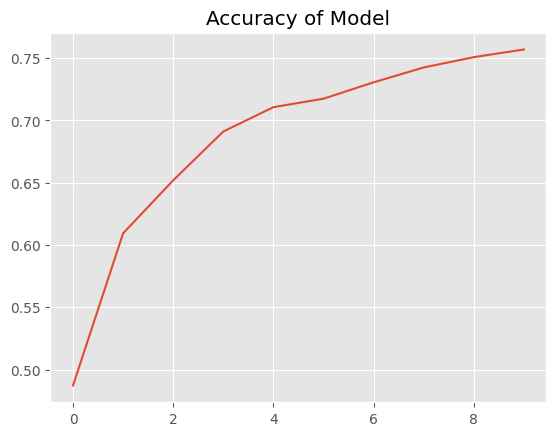

In [13]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy of Model')

Text(0.5, 1.0, 'Loss of Model')

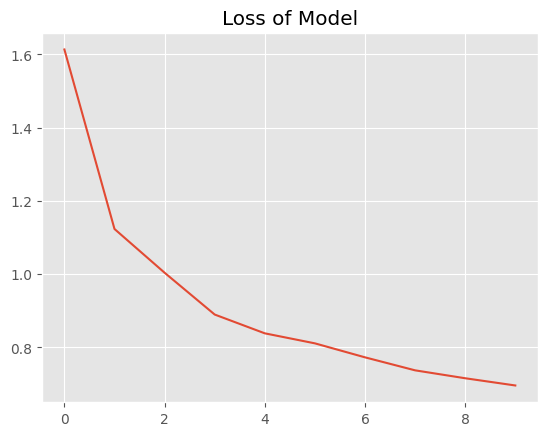

In [14]:
plt.plot(history.history['loss'])
plt.title('Loss of Model')

In [15]:
try: 
    import numpy as np
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns
    import matplotlib.pyplot as plt

    y_pred = model.predict(validation_data)

    y_pred_classes = np.argmax(y_pred, axis=1)

    y_true = validation_data.classes

    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))
except:
    print('nothing')

49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 599ms/step
Accuracy: 15.27%
nothing


In [16]:
for layer in base_model.layers[-10:]:  # Unfreeze last 10 layers
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
model.fit(train_data, epochs=5, validation_data=validation_data)


Epoch 1/5
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 762s 427ms/step - accuracy: 0.5347 - loss: 1.7624 - val_accuracy: 0.5048 - val_loss: 1.4405
Epoch 2/5
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 693s 405ms/step - accuracy: 0.7616 - loss: 0.6948 - val_accuracy: 0.5260 - val_loss: 1.3194
Epoch 3/5
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 679s 397ms/step - accuracy: 0.8315 - loss: 0.4932 - val_accuracy: 0.5343 - val_loss: 1.7803
Epoch 4/5
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 663s 388ms/step - accuracy: 0.8652 - loss: 0.3935 - val_accuracy: 0.5298 - val_loss: 2.0828
Epoch 5/5
1702/1702 ━━━━━━━━━━━━━━━━━━━━ 663s 388ms/step - accuracy: 0.8921 - loss: 0.3200 - val_accuracy: 0.5824 - val_loss: 1.8415


Text(0.5, 1.0, 'Loss of Model')

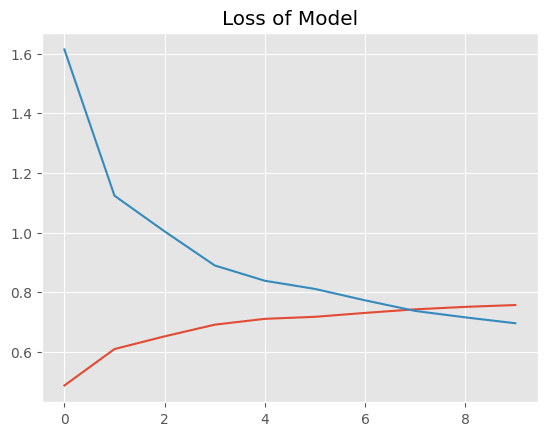

In [17]:
model.save('model2.h5')
plt.plot(history.history['accuracy'])
plt.title('Accuracy of Model')
plt.plot(history.history['loss'])
plt.title('Loss of Model')

In [18]:
try: 
    import numpy as np
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns
    import matplotlib.pyplot as plt

    y_pred = model.predict(validation_data)

    y_pred_classes = np.argmax(y_pred, axis=1)

    y_true = validation_data.classes

    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

    print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))
except:
    print('nothing')

49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 518ms/step
Accuracy: 12.25%
nothing
